In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [2]:
df1 = pd.read_csv('../data/raw/cpu4.csv')
df1 = df1.sort_values(by='timestamp', ascending=True)
df1 = df1.replace({'label': {0.0: False, 1.0: True}})

In [3]:
dfcpu = pd.read_csv('../data/processed/cpu4.csv')

In [4]:
dfcpu.head()

,timestamp,value,label,datetime,date,time,month,day,hour,minute
0,1469376000,0.847300,0,2016-07-24 16:00:00,2016-07-24,16:00:00,July,Sunday,16,0
1,1469376300,-0.036137,0,2016-07-24 16:05:00,2016-07-24,16:05:00,July,Sunday,16,5
2,1469376600,0.074292,0,2016-07-24 16:10:00,2016-07-24,16:10:00,July,Sunday,16,10
3,1469376900,0.074292,0,2016-07-24 16:15:00,2016-07-24,16:15:00,July,Sunday,16,15
4,1469377200,-0.036137,0,2016-07-24 16:20:00,2016-07-24,16:20:00,July,Sunday,16,20


In [5]:
df1.shape

(17568, 3)

How many anomalies do we have in the dataset?

In [6]:
print(df1.label.value_counts(), "\n","--------------------------")
print("in percentage", "\n", "--------------------------")
print(df1.label.value_counts(normalize=True))

False    17359
True       209
Name: label, dtype: int64 
 --------------------------
in percentage 
 --------------------------
False    0.988103
True     0.011897
Name: label, dtype: float64


In [7]:
df1.head()

,timestamp,value,label
0,1469376000,0.847300,False
1,1469376300,-0.036137,False
2,1469376600,0.074292,False
3,1469376900,0.074292,False
4,1469377200,-0.036137,False


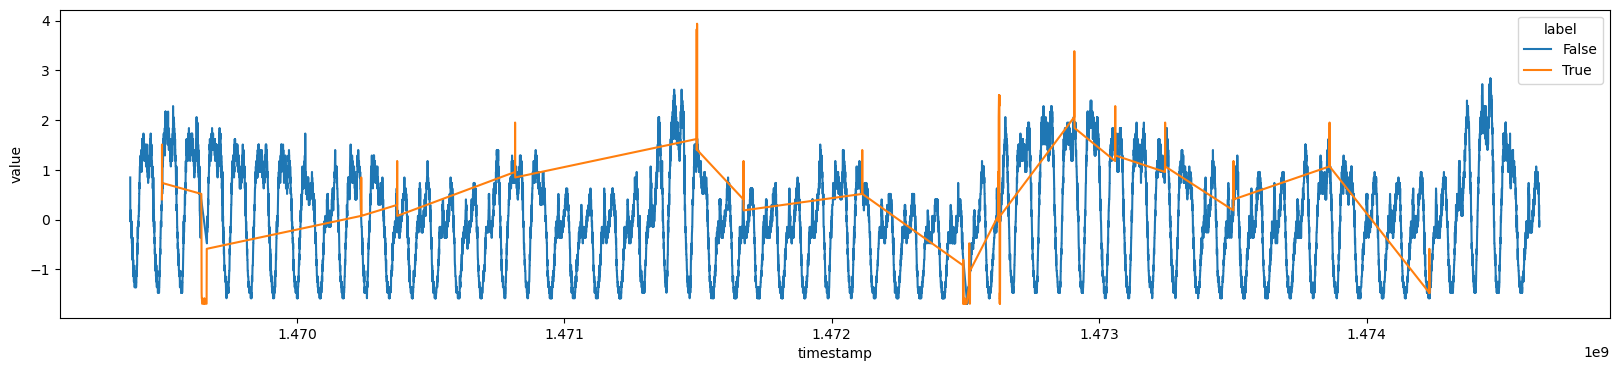

In [8]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df1, x="timestamp", y="value", hue="label")
plt.show()

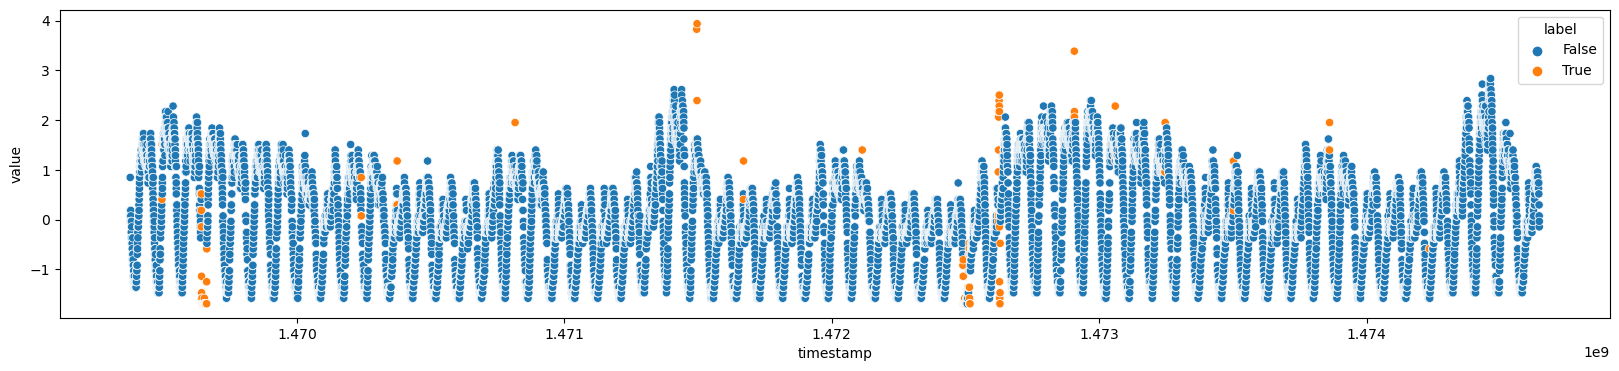

In [9]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=df1, x="timestamp", y="value", hue="label")
plt.show()

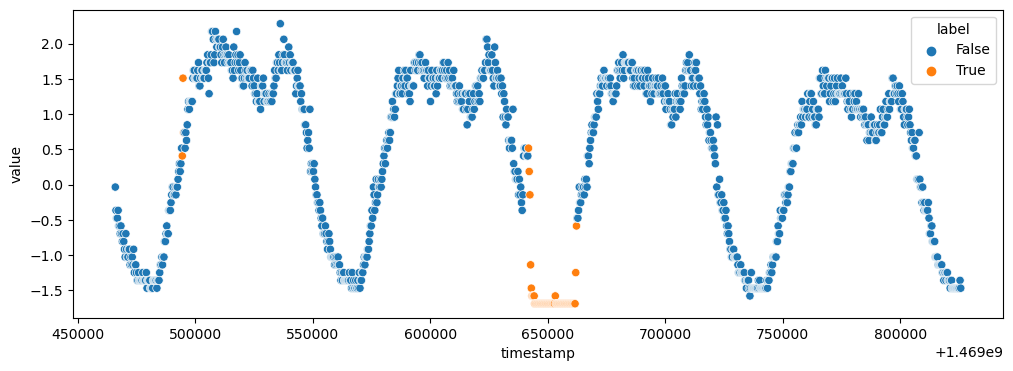

In [10]:
df1_zoom = df1[300:1500]
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="timestamp", y="value", hue="label")
plt.show()

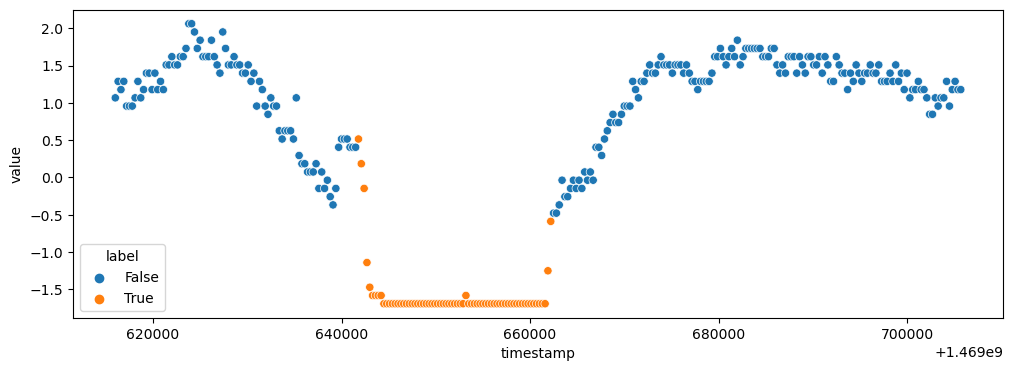

In [11]:
df1_zoom = df1[800:1100]
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="timestamp", y="value", hue="label")
plt.show()

In [12]:
dfcpu = pd.read_csv('../data/processed/cpu4.csv')
dfcpu

,timestamp,value,label,datetime,date,time,month,day,hour,minute
0,1469376000,0.847300,0,2016-07-24 16:00:00,2016-07-24,16:00:00,July,Sunday,16,0
1,1469376300,-0.036137,0,2016-07-24 16:05:00,2016-07-24,16:05:00,July,Sunday,16,5
2,1469376600,0.074292,0,2016-07-24 16:10:00,2016-07-24,16:10:00,July,Sunday,16,10
3,1469376900,0.074292,0,2016-07-24 16:15:00,2016-07-24,16:15:00,July,Sunday,16,15
4,1469377200,-0.036137,0,2016-07-24 16:20:00,2016-07-24,16:20:00,July,Sunday,16,20
...,...,...,...,...,...,...,...,...,...,...
17563,1474644900,0.074292,0,2016-09-23 15:35:00,2016-09-23,15:35:00,September,Friday,15,35
17564,1474645200,0.295152,0,2016-09-23 15:40:00,2016-09-23,15:40:00,September,Friday,15,40
17565,1474645500,0.074292,0,2016-09-23 15:45:00,2016-09-23,15:45:00,September,Friday,15,45
17566,1474645800,-0.146567,0,2016-09-23 15:50:00,2016-09-23,15:50:00,September,Friday,15,50


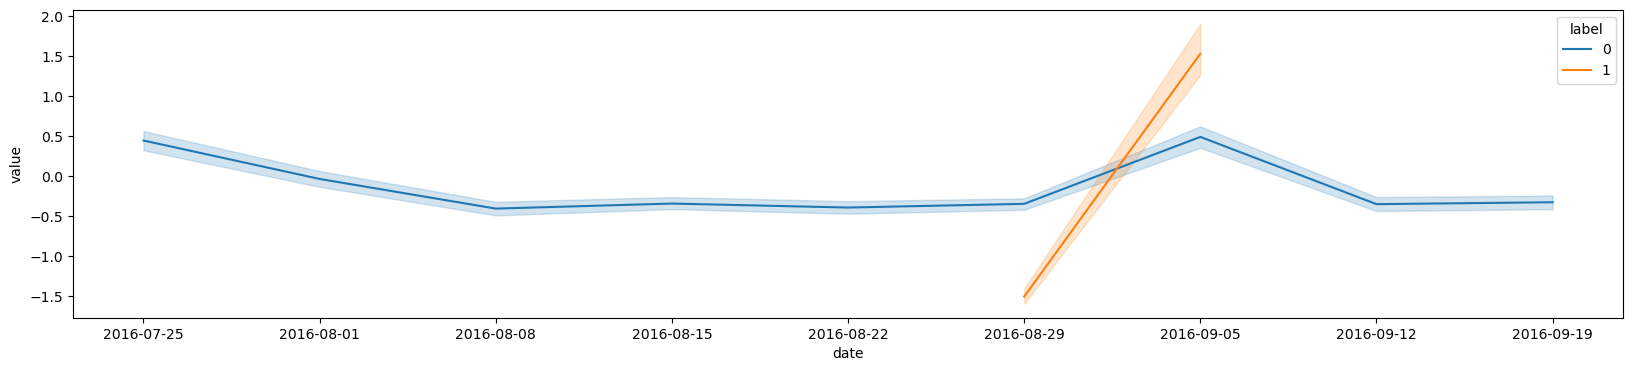

In [13]:
plt.figure(figsize=(20,4))
dfMon = dfcpu.loc[dfcpu.day == "Monday"].copy()
sns.lineplot(data=dfMon, x="date", y="value", hue="label")
plt.show()

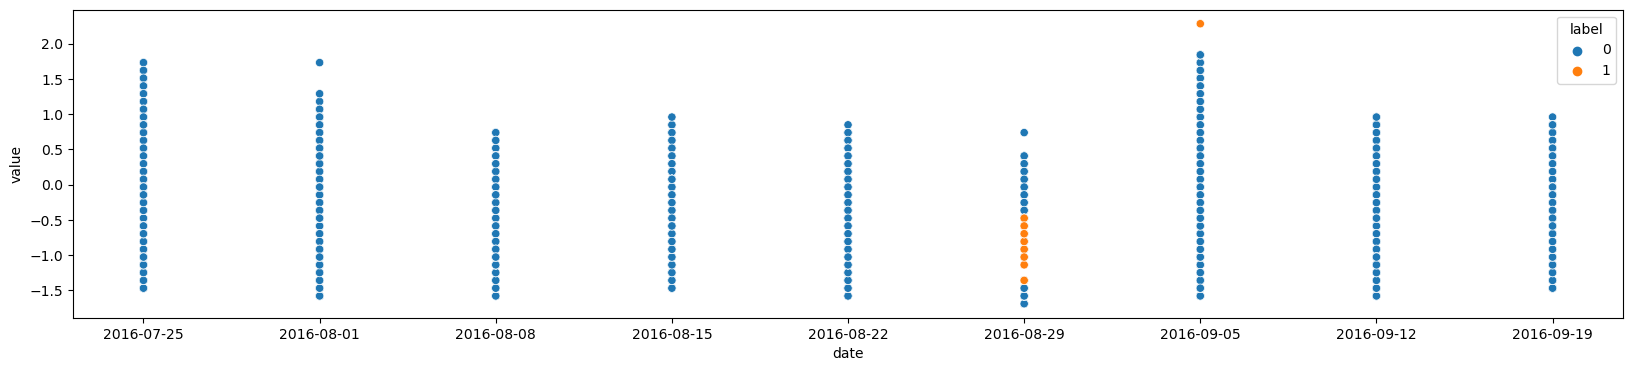

In [14]:
plt.figure(figsize=(20,4))
dfMon = dfcpu.loc[dfcpu.day == "Monday"].copy()
sns.scatterplot(data=dfMon, x="date", y="value", hue="label")
plt.show()

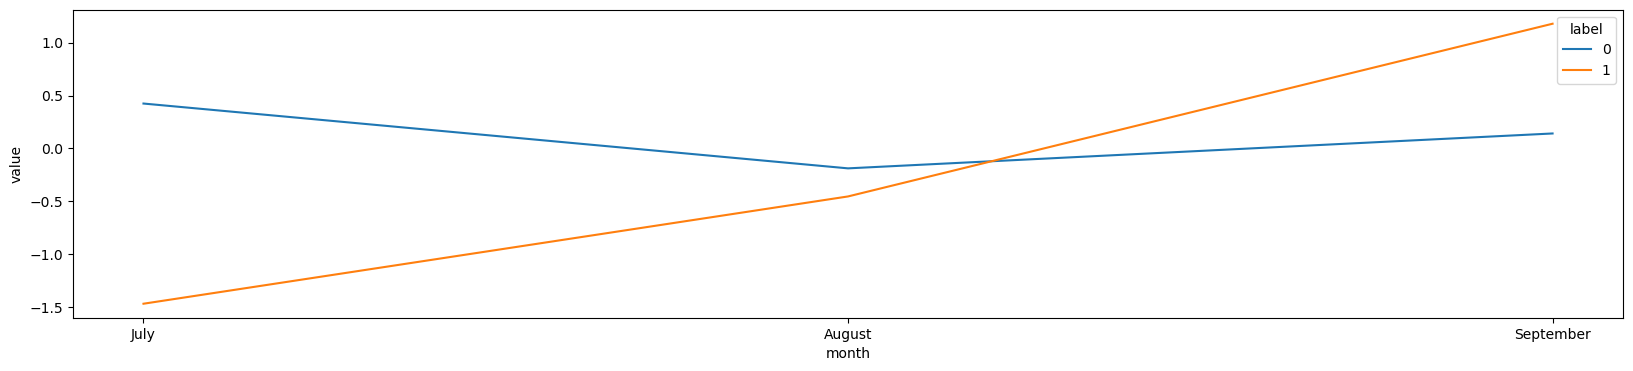

In [26]:
sns.reset_defaults()
plt.figure(figsize=(20,4))
# dfNormal = dfcpu.loc[dfcpu.label == 0].copy()
sns.lineplot(data=dfcpu, x="month", y="value", hue="label", errorbar = None)
plt.show()

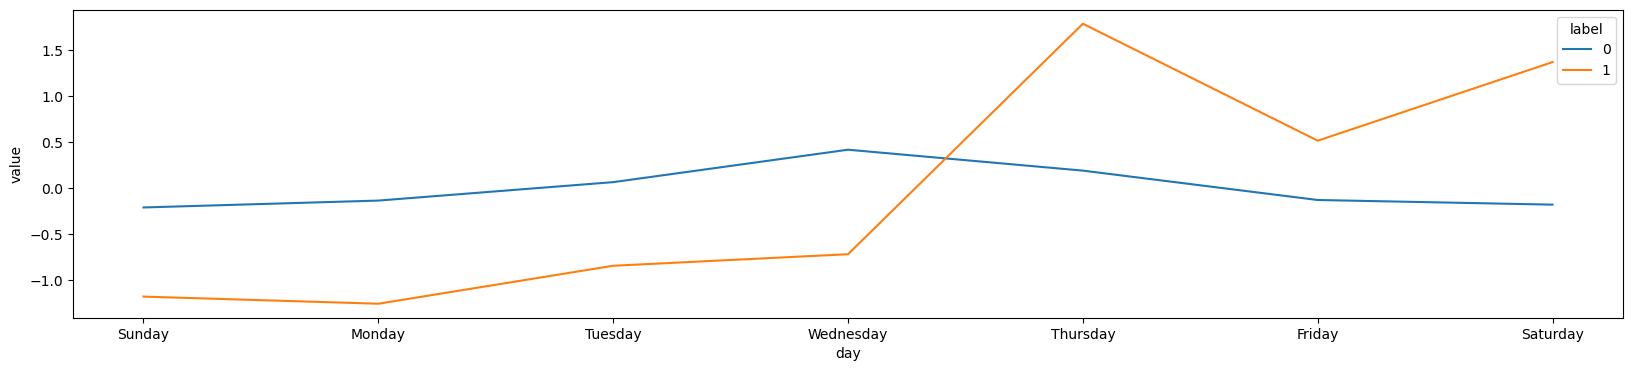

In [30]:
plt.figure(figsize=(20,4))
# dfAnomaly = dfcpu.loc[dfcpu.label == 1].copy()
sns.lineplot(data=dfcpu, x="day", y="value", hue="label", errorbar = None)
plt.show()

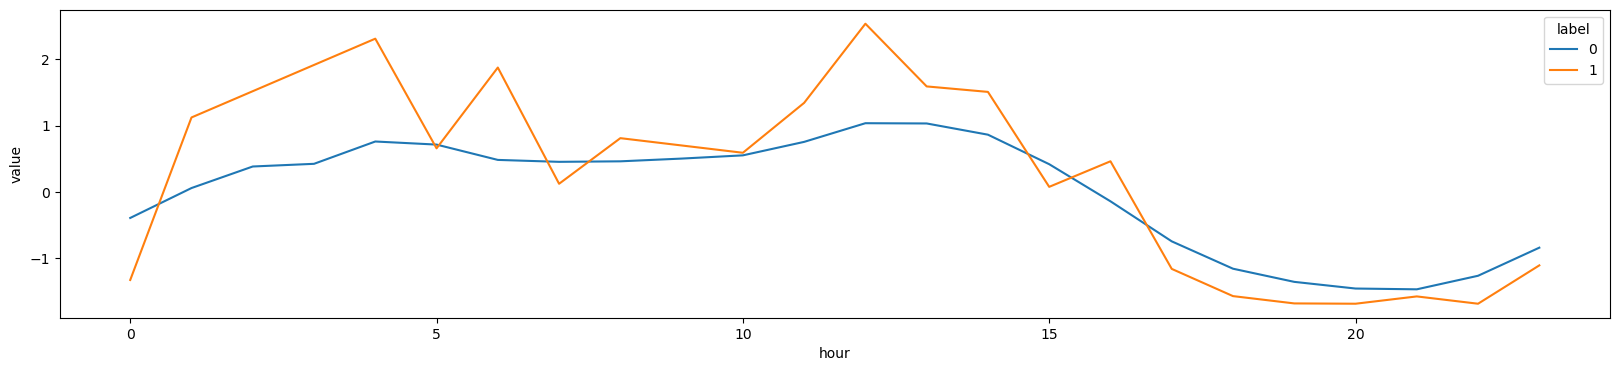

In [39]:
plt.figure(figsize=(20,4))
# dfAnomaly = dfcpu.loc[dfcpu.label == 1].copy()
sns.lineplot(data=dfcpu, x="hour", y="value", hue="label", errorbar = None)
plt.show()

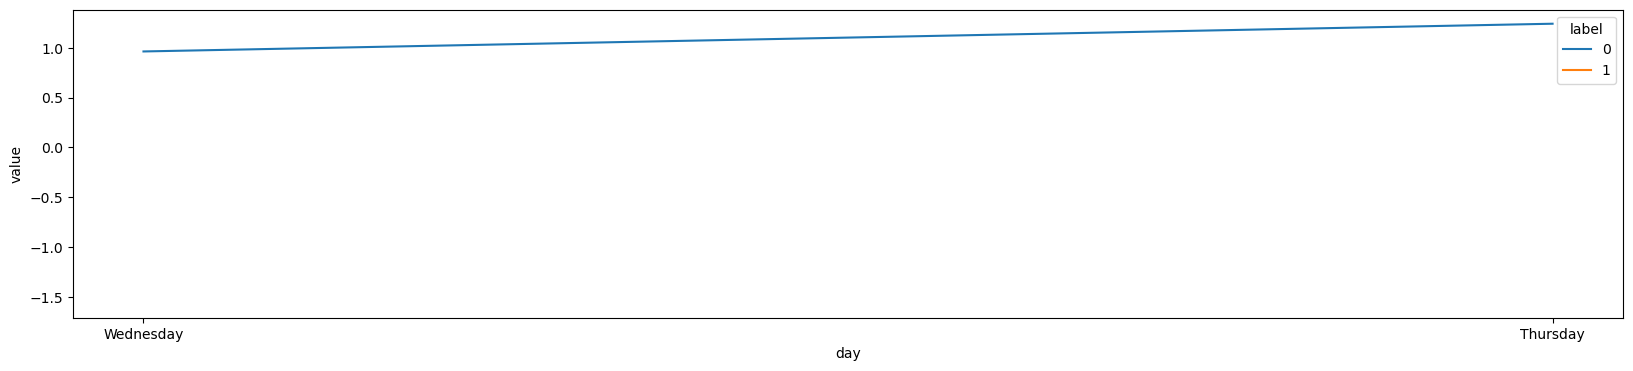

In [35]:
df1_zoom = dfcpu[800:1100]
plt.figure(figsize=(20,4))
# dfAnomaly = dfcpu.loc[dfcpu.label == 1].copy()
sns.lineplot(data=df1_zoom, x="day", y="value", hue="label", errorbar = None)
plt.show()

In [17]:
# dfMon = dfcpu.loc[dfcpu.day == "Monday"][["datetime","value"]].copy()
# dfMon.set_index("datetime", inplace = True)
# dfMon

In [18]:
print(dfcpu.loc[dfcpu.label == 0]["value"].mean())
print(dfcpu.loc[dfcpu.label == 1]["value"].mean())
print(dfcpu.value.mean())

0.007407318849242522
-0.6152327667416266
-1.9637932243722306e-11


In [19]:
print(dfcpu.loc[dfcpu.label == 0]["value"].median())
print(dfcpu.loc[dfcpu.label == 1]["value"].median())
print(dfcpu.value.median())

-0.036137314
-1.6925827919999998
-0.036137314
